In [6]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [7]:
# Function to load and preprocess images
def load_and_preprocess_images(dataset_path, image_size=(256, 256)):
    images = []
    labels = []
    label_map = {}
    for idx, animal in enumerate(os.listdir(dataset_path)):
        label_map[idx] = animal
        animal_path = os.path.join(dataset_path, animal)
        for img_filename in tqdm(os.listdir(animal_path), desc=f"Loading {animal}"):
            img_path = os.path.join(animal_path, img_filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Check if the image was loaded successfully
            if img is not None:
                img = cv2.resize(img, image_size)
                images.append(img)
                labels.append(idx)
            else:
                print(f"Warning: Image at path {img_path} could not be loaded.")
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_map


In [8]:
# Function to calculate distances
def calculate_distances(test_img, train_images, distance_metric='l1'):
    if distance_metric == 'l1':
        return np.sum(np.abs(train_images - test_img), axis=(1, 2))
    else:
        return np.sqrt(np.sum((train_images - test_img) ** 2, axis=(1, 2)))

In [9]:
# Function to get predictions
def get_predictions(train_images, train_labels, test_images, k, distance_metric='l1'):
    predictions = []
    for test_img in tqdm(test_images, desc="Predicting"):
        distances = calculate_distances(test_img, train_images, distance_metric)
        nearest_neighbors_ids = np.argsort(distances)[:k]
        nearest_labels = train_labels[nearest_neighbors_ids]
        unique, counts = np.unique(nearest_labels, return_counts=True)
        predictions.append(unique[np.argmax(counts)])
    return predictions

In [10]:
# Function to calculate accuracy
def calculate_accuracy(predictions, true_labels):
    return np.mean(predictions == true_labels)

In [11]:
# Plotting function
def plot_accuracies(k_values, accuracies_l1, accuracies_l2):
    plt.figure(figsize=(14, 8))
    plt.plot(k_values, accuracies_l1, marker='o', linestyle='-', color='r', label='Manhattan (L1)')
    plt.plot(k_values, accuracies_l2, marker='o', linestyle='-', color='b', label='Euclidean (L2)')
    plt.title('Cross-Validation Accuracy')
    plt.xlabel('k (Number of Nearest Neighbors)')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [12]:
# Display top 5 predictions
def display_predictions(test_images, predictions, true_labels, label_map, num_to_display=5):

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, predictions) * 100  # Convert to percentage

    plt.figure(figsize=(20, 10))
    for i in range(num_to_display):
        plt.subplot(1, num_to_display, i + 1)
        plt.imshow(test_images[i], cmap='gray')
        plt.title(f'Predicted: {label_map[predictions[i]]}\nActual: {label_map[true_labels[i]]}')
        plt.axis('off')
    plt.show()
    # Print and return the accuracy
    print(f"Accuracy: {accuracy:.2f}%")
    return accuracy

In [25]:
#import os
#path = '../content/gdrive/MyDrive/animal/animals/images'  # Update with the correct dataset path
#print(path)
#print(12)

# List the contents of the folder, ensure the path is correct
#dataset_path = os.listdir('/content/Downloads/animal')

#from google.colab import drive
#drive.mount('/content/drive') # mount to /content/drive
#path = '/content/drive/MyDrive/animal/animals/images'
#print(path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Predicting: 100%|██████████| 472/472 [01:30<00:00,  5.20it/s]


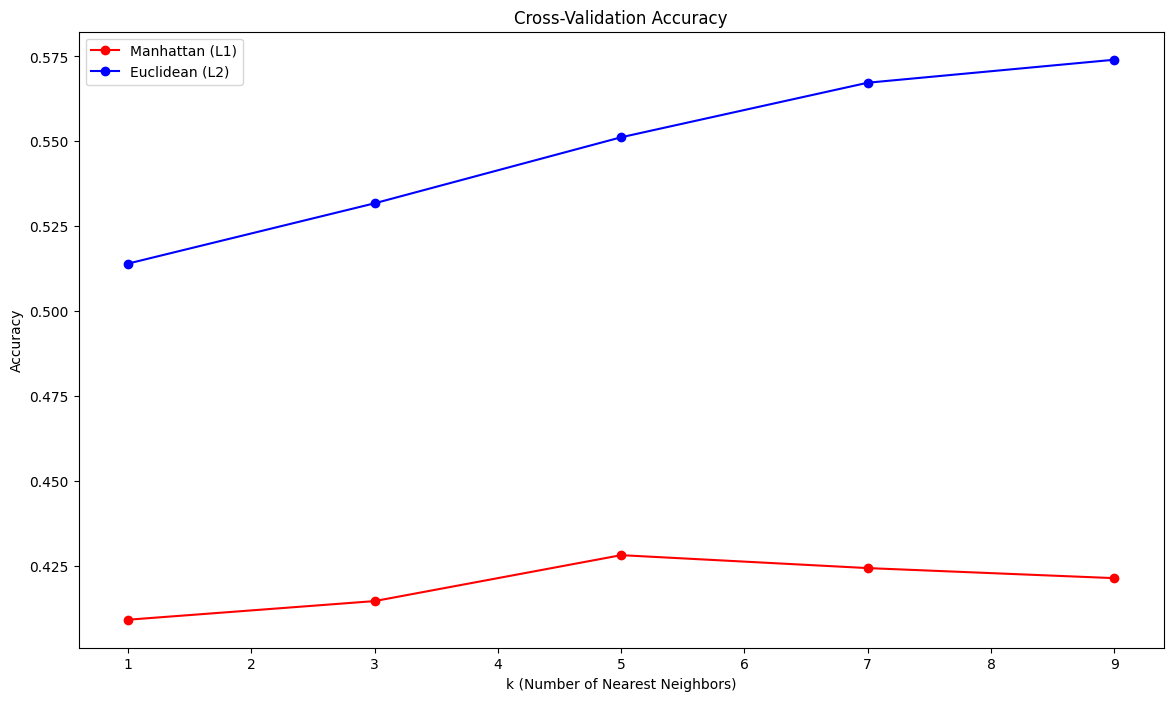

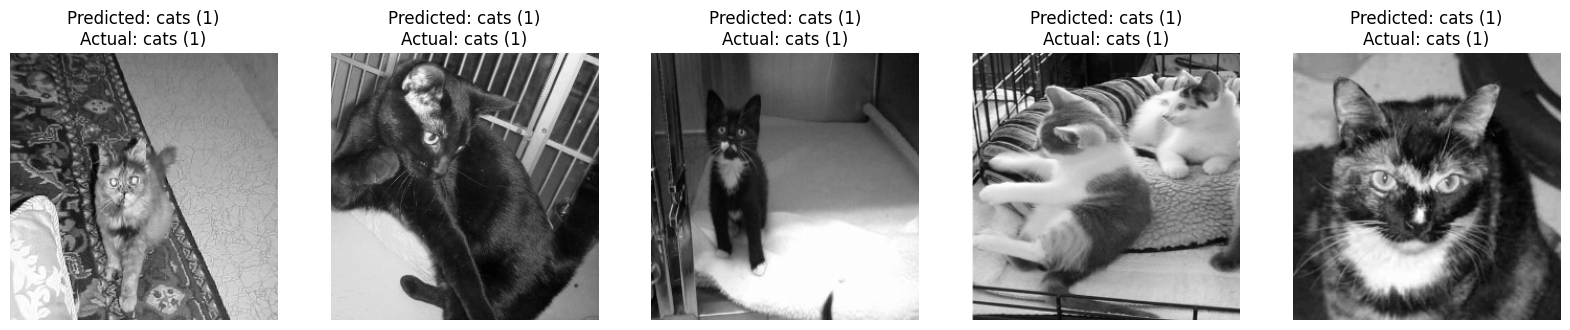

Accuracy: 55.30%


In [23]:
# Main script
from google.colab import drive
drive.mount('/content/gdrive')
dataset_path = '../content/gdrive/MyDrive/animal/animals/animals'  # Update with the correct dataset path
images, labels, label_map = load_and_preprocess_images(dataset_path)

k_values = [1, 3, 5, 7, 9]
folds = 5
kf = KFold(n_splits=folds, shuffle=True, random_state=42)

accuracies_l1 = {k: [] for k in k_values}
accuracies_l2 = {k: [] for k in k_values}

for train_index, test_index in kf.split(images):
    train_images, test_images = images[train_index], images[test_index]
    train_labels, test_labels = labels[train_index], labels[test_index]

    for k in k_values:
        # L1 distance predictions
        predictions_l1 = get_predictions(train_images, train_labels, test_images, k, 'l1')
        accuracy_l1 = calculate_accuracy(predictions_l1, test_labels)
        accuracies_l1[k].append(accuracy_l1)

        # L2 distance predictions
        predictions_l2 = get_predictions(train_images, train_labels, test_images, k, 'l2')
        accuracy_l2 = calculate_accuracy(predictions_l2, test_labels)
        accuracies_l2[k].append(accuracy_l2)

mean_accuracies_l1 = [np.mean(accuracies_l1[k]) for k in k_values]
mean_accuracies_l2 = [np.mean(accuracies_l2[k]) for k in k_values]

plot_accuracies(k_values, mean_accuracies_l1, mean_accuracies_l2)

# Top 5 predictions display
accuracy = display_predictions(test_images, predictions_l2, test_labels, label_map, num_to_display=5)

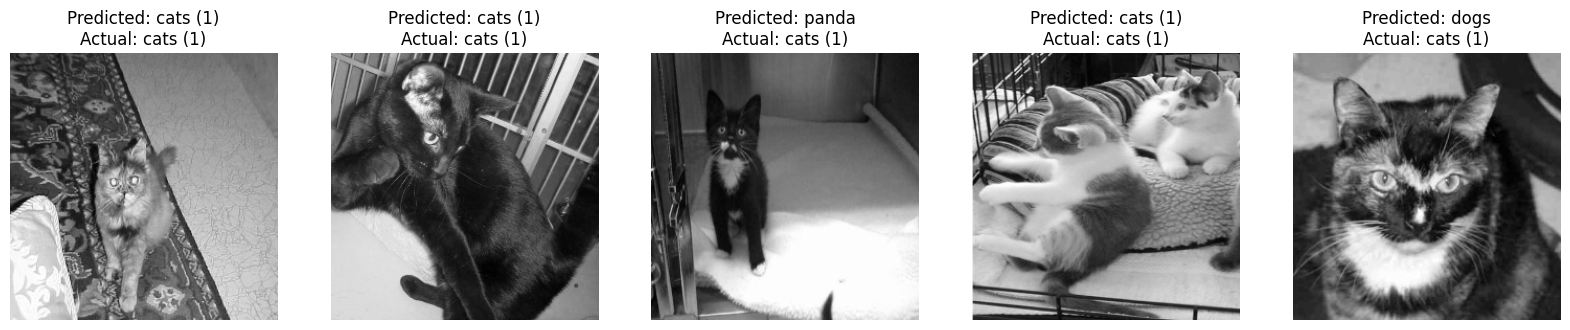

Accuracy: 38.56%


In [24]:
accuracy = display_predictions(test_images, predictions_l1, test_labels, label_map, num_to_display=5)